<a href="https://www.kaggle.com/code/ryanlliu/assignment-1?scriptVersionId=127138306" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Assignment 1

## Part 1:

1. How would you define machine learning?
    
    Machine learning provides a computer with data, rather than explicit instructions. Using these data, the computer learns to recognize patterns and becomes able to execute tasks on its own.
    
2. What is a labeled training set, dataset, feature, ground truth?
    - A labeled training set is a subset of a dataset that has both features and labels for each data point
    - A dataset is a collection of data points that can be used for training, testing, or evaluating a machine learning model. A dataset can be composed of features and labels (or targets), which are the desired outputs for the model.
    - A feature is an individual measurable property or characteristic of a phenomenon being observed.
    - A ground truth is the true or correct label for a data point. A ground truth can be obtained from human annotation, expert knowledge, or other reliable sources. A ground truth is used to evaluate the performance of a machine learning model by comparing its predictions with the actual labels.
3. What are the two most common supervised tasks?
    - Classification
    - Regression

4. Name four common unsupervised tasks?

- Clustering
- Association
- Dimensionality reduction
- Representation learning

5. What type of algorithm would you use to segment your customers into multiple groups?

- Clustering

6. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?

- Supervised learning

7. Can you name four of the main challenges in machine learning?

- Data quality: The quality and quantity of data used to train machine learning models are critical for their performance and reliability. Issues with data quality, such as noise, outliers, missing values, inconsistency, bias, or imbalance, can have adverse effects on the models. To address these issues, data preprocessing, cleaning, validation, and augmentation are necessary.
- **Model selection**: Choosing the best machine learning model for a given task or domain requires careful consideration of the data characteristics, evaluation metrics, computational resources, and domain knowledge. It also involves tuning the hyperparameters of the model to optimize its performance and avoid overfitting or underfitting.
- **Generalization**: Generalization of machine learning models to new or unseen data can be challenging due to various factors, such as the trade-off between bias and variance, the curse of dimensionality, the risk of overfitting or underfitting, and the distribution shift or concept drift. To improve generalization, regularization techniques, cross-validation methods, ensemble methods, transfer learning methods, or active learning methods can be employed.
- **Explainability**: Machine learning models often act as black boxes, making it difficult to understand their behavior and limitations. Explainability is crucial for verifying their correctness and reliability, debugging their errors or failures, improving their performance or design, and ensuring their fairness and accountability. Various methods can be used to achieve explainability, such as interpretable models, feature importance methods, model visualization methods, or post-hoc explanation methods.

8. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?

- Overfitting
- 3 possible solution:
    - Regularization
    - Cross-validation
    - Data augmentation

9. What is a test set, and why would you want to use it?

- A test set is a subset of the data that is not used for training or validation, but only for evaluating the final performance and generalization ability of the model

10. What is the purpose of a validation set?

- A validation set is a subset of the data that is not used for training, but for tuning the hyperparameters of the model or selecting the best model among different candidates.

11. Which linear regression training algorithm can you use if you have a training set with millions of features?

- Elastic net
- Lasso Regression
- Ridge Regression

12. What is feature engineering? Give an example about feature selection?

- Feature engineering is the process of creating, transforming, or selecting features that can improve the performance or interpretability of a machine learning model.
- An example of feature selection is using correlation analysis to filter out features that are highly correlated with each other or with the target variable. Correlation analysis measures the strength and direction of the linear relationship between two variables. Features that are highly correlated with each other can cause multicollinearity problems, which can affect the stability and interpretability of the model. Features that are highly correlated with the target variable can be redundant or irrelevant, which can affect the accuracy and generalization of the model. Therefore, correlation analysis can help identify and remove such features and keep only the features that are most informative and independent for the model.


# Part 2:

1. [https://github.com/GokuMohandas/Made-With-ML/blob/main/notebooks/06_Linear_Regression.ipynb](https://github.com/GokuMohandas/Made-With-ML/blob/main/notebooks/06_Linear_Regression.ipynb)
2. [https://github.com/aim-lab/mlh-course-material/blob/master/tutorials/BME-336546-C03-Linear%20regression/linear%20regression.ipynb](https://github.com/aim-lab/mlh-course-material/blob/master/tutorials/BME-336546-C03-Linear%20regression/linear%20regression.ipynb)
3. [https://www.kaggle.com/code/vedangisharma/predicting-diabetic-patients/notebook](https://www.kaggle.com/code/vedangisharma/predicting-diabetic-patients/notebook) 
    
    3.1. Use different models to train
    
    3.2. Compare the accurary and other values in confusion matrix of these models

# Loading Dataset 

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/predict-diabetes-based-on-diagnostic-measures/diabetes.csv


In [2]:
df=pd.read_csv('../input/predict-diabetes-based-on-diagnostic-measures/diabetes.csv')

In [3]:
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes


In [4]:
df.shape

(390, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_number   390 non-null    int64 
 1   cholesterol      390 non-null    int64 
 2   glucose          390 non-null    int64 
 3   hdl_chol         390 non-null    int64 
 4   chol_hdl_ratio   390 non-null    object
 5   age              390 non-null    int64 
 6   gender           390 non-null    object
 7   height           390 non-null    int64 
 8   weight           390 non-null    int64 
 9   bmi              390 non-null    object
 10  systolic_bp      390 non-null    int64 
 11  diastolic_bp     390 non-null    int64 
 12  waist            390 non-null    int64 
 13  hip              390 non-null    int64 
 14  waist_hip_ratio  390 non-null    object
 15  diabetes         390 non-null    object
dtypes: int64(11), object(5)
memory usage: 48.9+ KB


In [6]:
df.describe()

,patient_number,cholesterol,glucose,hdl_chol,age,height,weight,systolic_bp,diastolic_bp,waist,hip
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,195.500000,207.230769,107.338462,50.266667,46.774359,65.951282,177.407692,137.133333,83.289744,37.869231,42.992308
std,112.727548,44.666005,53.798188,17.279069,16.435911,3.918867,40.407824,22.859528,13.498192,5.760947,5.664342
min,1.000000,78.000000,48.000000,12.000000,19.000000,52.000000,99.000000,90.000000,48.000000,26.000000,30.000000
25%,98.250000,179.000000,81.000000,38.000000,34.000000,63.000000,150.250000,122.000000,75.000000,33.000000,39.000000
50%,195.500000,203.000000,90.000000,46.000000,44.500000,66.000000,173.000000,136.000000,82.000000,37.000000,42.000000
75%,292.750000,229.000000,107.750000,59.000000,60.000000,69.000000,200.000000,148.000000,90.000000,41.000000,46.000000
max,390.000000,443.000000,385.000000,120.000000,92.000000,76.000000,325.000000,250.000000,124.000000,56.000000,64.000000


The following is the normal range of the different blood solutes:
1. Cholestrol - under 200
2. Glucose 80-120(normal)
3. HDL Cholestrol more than 60
4. Systolic BP - 120
5. Distolic BP - 80

Following are the points of concern in the above code output:
- Maximum cholestrol found in the data is 443, glucose 385, hdl -cholestrol 120, systolic BP 250, distolic 124
- Minimum hdl-chol value is 12.
- The weight of the 75% of patients is between 99-200.

# Data PreProcessing

In [7]:
df['isdiab']=df['diabetes'].map({'Diabetes':1, 'No diabetes':0})
df['isdiab']

0      0
1      0
2      0
3      0
4      0
      ..
385    0
386    1
387    0
388    1
389    0
Name: isdiab, Length: 390, dtype: int64

Removing the fields which are not that important 

In [8]:
df.drop(['waist','hip','waist_hip_ratio'],inplace=True, axis=1)

# EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

It is generally seen that higher weight and old Age are two major factor causing diabetes.

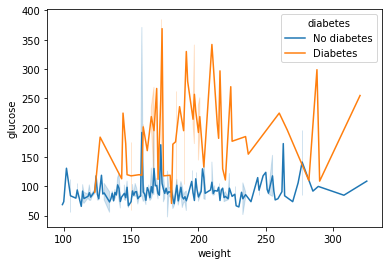

In [10]:
sns.lineplot(y ='glucose',x='weight', hue='diabetes', data =df)
plt.show()

Diabetic patients have Higher glucose rate and higher weight as comapred to Non -diabetic ones

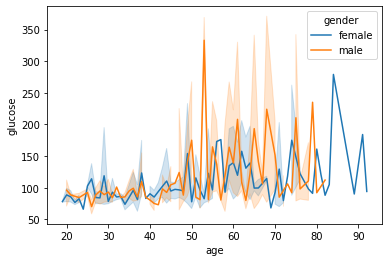

In [11]:
sns.lineplot(y ='glucose',x='age', hue='gender', data =df)
plt.show()

The Age is not directly related but higher gluose level in oldies can be a cause of Diabetes in them, also the males of age 40 to 80 have higher blood glucose level than females.

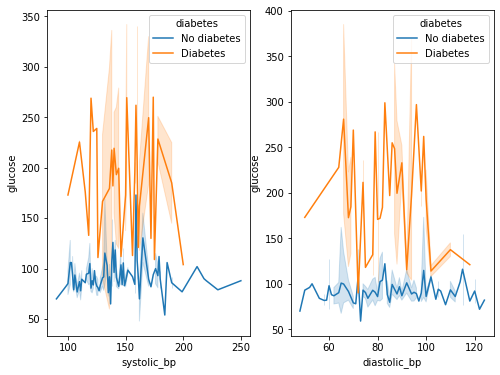

In [12]:
figure, axis = plt.subplots(1,2,figsize=(8,6))
sns.lineplot(ax=axis[0],x='systolic_bp', y='glucose',hue='diabetes',data=df)
sns.lineplot(ax=axis[1],x='diastolic_bp', y='glucose',hue='diabetes',data=df)
plt.show()

The BP is not directly related to the diabetes, as patients have highest BP are Found to be Non-diabetic.

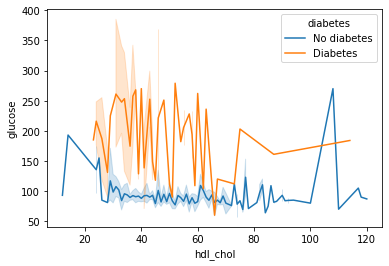

In [13]:
sns.lineplot(x=df.hdl_chol,y= df.glucose,hue=df.diabetes,data=df)
plt.show()

Diabetic patients have lower HDL-Cholesterol 

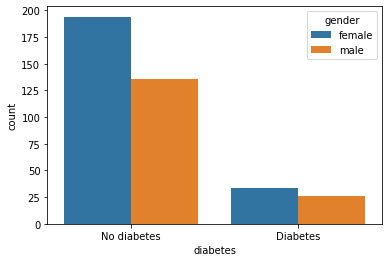

In [14]:
sns.countplot(x='diabetes',hue='gender',data=df)
plt.show()

Females being diabetic are more than the males being diabetic. 

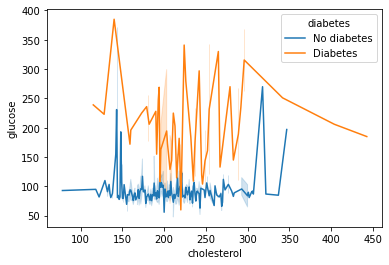

In [15]:
sns.lineplot(x=df.cholesterol,y= df.glucose,hue=df.diabetes,data=df)
plt.show()

Higher cholestrol is seen in the patients having diabetes

In [16]:
df.corr()

,patient_number,cholesterol,glucose,hdl_chol,age,height,weight,systolic_bp,diastolic_bp,isdiab
patient_number,1.000000,0.252092,0.307722,-0.000842,0.988888,-0.063513,-0.042151,0.450950,0.084154,0.317830
cholesterol,0.252092,1.000000,0.158102,0.193162,0.247333,-0.063601,0.062359,0.207741,0.166241,0.204262
glucose,0.307722,0.158102,1.000000,-0.158302,0.294392,0.098052,0.190358,0.162777,0.020262,0.689080
hdl_chol,-0.000842,0.193162,-0.158302,1.000000,0.028210,-0.087238,-0.291883,0.031807,0.078342,-0.123133
age,0.988888,0.247333,0.294392,0.028210,1.000000,-0.082229,-0.056784,0.453417,0.068649,0.301995
height,-0.063513,-0.063601,0.098052,-0.087238,-0.082229,1.000000,0.255389,-0.040704,0.043617,0.023466
weight,-0.042151,0.062359,0.190358,-0.291883,-0.056784,0.255389,1.000000,0.097497,0.166477,0.162987
systolic_bp,0.450950,0.207741,0.162777,0.031807,0.453417,-0.040704,0.097497,1.000000,0.603662,0.198600
diastolic_bp,0.084154,0.166241,0.020262,0.078342,0.068649,0.043617,0.166477,0.603662,1.000000,0.049351
isdiab,0.317830,0.204262,0.689080,-0.123133,0.301995,0.023466,0.162987,0.198600,0.049351,1.000000


As we have seen in the above plots as well,`Glucose` is direclty realted to the cause of diabetes. The good cholestrol or `HDL-cholestrol` is negativey related,`weight`,`age` and `cholestrol` are also realted but to a very smaller extent, the male patients have higher Glucose level but out of total patients, female patients were more diabetic than males,but the difference was very small.

### Features for building the model  
 1.  cholesterol      
 2.  glucose          
 3.  hdl_chol           
 4.  age              
 5.  gender                      
 6.  weight                         
 7.  systolic_bp      
 8.  diastolic_bp     
 9.  diabetes - The target    

In [17]:
df1=df[['patient_number','cholesterol','glucose','hdl_chol','age','gender','weight','systolic_bp','diastolic_bp','diabetes']]
df1

,patient_number,cholesterol,glucose,hdl_chol,age,gender,weight,systolic_bp,diastolic_bp,diabetes
0,1,193,77,49,19,female,119,118,70,No diabetes
1,2,146,79,41,19,female,135,108,58,No diabetes
2,3,217,75,54,20,female,187,110,72,No diabetes
3,4,226,97,70,20,female,114,122,64,No diabetes
4,5,164,91,67,20,female,141,122,86,No diabetes
...,...,...,...,...,...,...,...,...,...,...
385,386,227,105,44,83,female,125,150,90,No diabetes
386,387,226,279,52,84,female,192,144,88,Diabetes
387,388,301,90,118,89,female,115,218,90,No diabetes
388,389,232,184,114,91,female,127,170,82,Diabetes


In [18]:
X= df1[['patient_number','cholesterol','glucose','hdl_chol','age','weight','systolic_bp','diastolic_bp']]
y=df1['diabetes']

# Model Training

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.4,random_state=1)

## KNN 
- Train and evaluate using cross-validation

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 

# optimizing parameter function
def optimizing_parameter(n_neighbors):
    kNN = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # 5-fold cross-validation
    cv_scores = cross_val_score(kNN, X_train, y_train,
                               cv=5,
                               scoring='accuracy')
    return cv_scores.mean()

# try value of neighbours: 1,2,...,10
results = {i: optimizing_parameter(i) for i in range(1,30,1)}

- Visualize to choose the best parameter

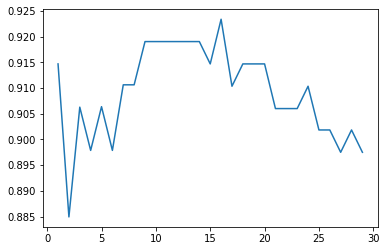

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [22]:
choose_k = max(results, key=results.get)
accu = round(results[choose_k]*100, 1)
print(f'The model provides an accuracy of {accu}%, when we kept the value of neighbours={choose_k}')

The model provides an accuracy of 92.3%, when we kept the value of neighbours=16


## Linear regression perceptron learning rule

In [23]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score 

model = Perceptron()

# 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train,
                           cv=5,
                           scoring='accuracy')
accu = round(cv_scores.mean()*100, 1)
print(f'The accuracy when using Linear regression using perceptron learning rule is {accu}%')

The accuracy when using Linear regression using perceptron learning rule is 80.8%


## Support Vector Machine

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score 

model = SVC()

# 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train,
                           cv=5,
                           scoring='accuracy')
accu = round(cv_scores.mean()*100, 1)
print(f'The accuracy when using SVM is {accu}%')

The accuracy when using SVM is 91.9%


## Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score 

model = GaussianNB()

# 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train,
                           cv=5,
                           scoring='accuracy')
accu = round(cv_scores.mean()*100, 1)
print(f'The accuracy when using Naive Bayes is {accu}%')

The accuracy when using Naive Bayes is 91.0%
